In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

sns.set_style("darkgrid")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
PATH_ROOT=Path("../").resolve()
PATH_ROOT

PosixPath('/data/horse/ws/s4610340-superconduct/superconduct-tc-reg')

## First view

In [3]:
df = pd.read_csv(PATH_ROOT/"data/raw/superconductivity_data/train.csv")
col_target = "critical_temp"
col_features = [c for c in df.columns if c != col_target]
with pd.option_context('display.max_columns', 82):
    display(df)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425000,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.250000,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.837500,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.905500,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440000,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.200000,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.890000,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.784400,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425000,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.250000,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,3592.019281,81.837500,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.905500,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.

In [4]:
with pd.option_context('display.max_columns', 82):
    display(df.describe(percentiles=[.05, .25, .5, .75, .95]))

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,41.448045,769.614748,870.442317,737.474751,832.769649,1.299172,0.926726,572.222612,483.517264,215.631279,224.050033,157.983101,134.720039,144.448738,120.989330,1.267756,1.131138,139.325025,51.369885,51.601267,52.340465,6111.465214,5267.188547,3460.692235,3117.241110,1.072425,0.856037,8665.438818,2902.736814,3416.910784,3319.170628,76.879751,92.717486,54.359502,72.416225,1.070250,0.770757,120.730514,59.332637,48.912207,44.409356,14.296113,13.848001,10.136977,10.141161,1.093343,0.914065,21.138994,8.218528,8.323333,7.717576,89.706911,81.549080,29.841727,27.308061,0.727630,0.539991,250.893443,62.033066,98.943993,96.234051,3.198228,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,19.983544,87.488694,143.278200,78.327275,119.772520,0.381935,0.334018,309.614442,224.042874,109.966774,127.927104,20.147288,28.801567,22.090958,35.837843,0.375411,0.407159,67.272228,35.019356,22.898396,25.294524,2846.785185,3221.314506,3703.256370,3975.122587,0.342356,0.319761,4097.126831,2398.471020,1673.624915,1611.799629,27.701890,32.276387,29.007425,31.648444,0.343391,0.285986,58.700327,28.620

array([[<Axes: title={'center': 'critical_temp'}>]], dtype=object)

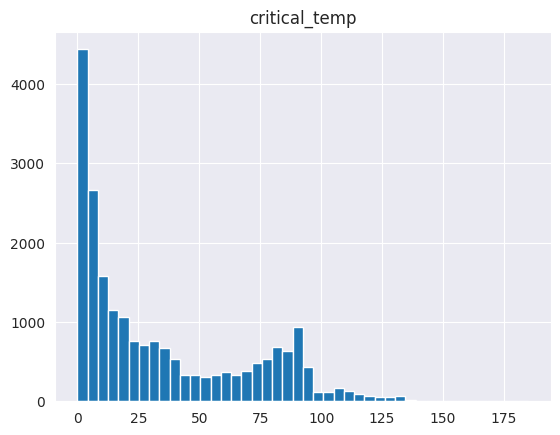

In [10]:
df.hist(column=col_target, bins=44)

In [11]:
df_elements = pd.read_csv(PATH_ROOT/"data/raw/superconductivity_data/unique_m.csv")
df_elements

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.00,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.00,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.00,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.00,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.00,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,2.44,Tm0.84Lu0.16Fe3Si5
21259,0.0,0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,122.10,Tl1Ba2Ca3Cu4O11
21260,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.98,Nb0.8Pd0.2
21261,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.84,Nb0.69Pd0.31


## Data cleaning

### Check NaNs

In [12]:
df.columns[df.isna().any()]

Index([], dtype='object')

There are no missing values in the dataset.

### Outliers

In [13]:
df_elements.sort_values(col_target, ascending=False).iloc[:20]

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
20573,2.0,0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0,...,0.0,0.00,0.0,0.00,0.0,0,0,0,185.0,H2S1
3985,0.0,0,0.0,0.0,0.0,0.0,0.0,8.400,0.0,0,...,0.0,0.66,0.0,0.34,0.0,0,0,0,143.0,Hg0.66Pb0.34Ba2Ca1.98Cu2.9O8.4
5200,0.0,0,0.0,0.0,0.0,0.0,0.0,8.000,0.0,0,...,0.0,0.70,0.0,0.30,0.0,0,0,0,143.0,Hg0.7Pb0.3Ba2Ca2Cu3O8
19039,0.0,0,0.0,0.0,0.0,0.0,0.0,9.000,0.0,0,...,0.0,0.20,0.8,0.00,0.0,0,0,0,137.4,Tl0.8Hg0.2Ba2Ca2Cu3O9
1343,0.0,0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0,...,0.0,0.00,0.0,0.20,1.8,0,0,0,136.0,Bi1.8Pb0.2Sb0.1Sr2Ca2Cu2O
1341,0.0,0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0,...,0.0,0.00,0.0,0.40,1.6,0,0,0,136.0,Bi1.6Pb0.4Sb0.1Sr2Ca2Cu2O
5476,0.0,0,0.0,0.0,0.0,0.0,0.0,8.208,0.0,0,...,0.0,0.75,0.0,0.00,0.0,0,0,0,135.8,Hg0.75Ba2.07Ca2.07Cu3.11O8.208
7105,0.0,0,0.0,0.0,0.0,0.0,0.0,8.000,0.0,0,...,0.0,1.00,0.0,0.00,0.0,0,0,0,135.7,Hg1Ba2Ca2Cu3O8
4709,0.0,0,0.0,0.0,0.0,0.0,0.0,8.000,0.0,0,...,0.0,1.00,0.0,0.00,0.0,0,0,0,135.5,Hg1Ba2Ca2Cu3O8
5475,0.0,0,0.0,0.0,0.0,0.0,0.0,8.187,0.0,0,...,0.0,0.75,0.0,0.00,0.0,0,0,0,135.4,Hg0.75Ba2.07Ca2.07Cu3.11O8.187


In [14]:
df_elements.loc[df_elements["material"]=="H2S1"]

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
20572,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,60.0,H2S1
20573,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,185.0,H2S1


Remove H2S1 at T_c = 185.0 as the measurements were taken at high pressure, which is a measurement condition not representative of all other samples.

In [15]:
df = df.drop(index=20573)
df_elements = df_elements.drop(index=20573)

### Duplicates [Iteration 2]

Assume, that materials with same element proportions, but different element ordering are different. 

How many duplicated entries (for example due to different values enetered by different labs):

In [16]:
df_elements["duplicated"] = df_elements["material"].duplicated(keep=False)
df_elements_duplicates = df_elements.loc[df_elements["duplicated"]].groupby("material").agg(**{
    "count": pd.NamedAgg(column="critical_temp", aggfunc=lambda xs: len(xs)),
    "magnitude": pd.NamedAgg(column="critical_temp", aggfunc=lambda xs: xs.max()-xs.min()), 
}) # type: ignore
df_elements_duplicates

,count,magnitude
material,,
Ag0.81Sn1.19Se2,2,0.11
Ag0.85Sn1.15Se2,2,0.11
Ag0.95Sn1.05Se2,2,0.07
Ag1In2,2,0.10
Ag1La1,3,0.24
...,...,...
Zr1Ru1P1,13,10.34
Zr1Ru1Si1,3,7.20
Zr41.2Ti13.8Cu12.5Ni10Be22.5,2,0.20


In [12]:
df_elements_duplicates["count"].sum()

np.int64(7980)

In [17]:
df_elements_duplicates.loc[df_elements_duplicates["magnitude"]>5]

,count,magnitude
material,,
Al0.24Nb0.76,4,14.80
Al0.25Nb0.75,3,11.60
Al1Nb3,15,15.70
As1Ga1,5,7.00
As1Nb3,3,6.25
...,...,...
Yb1Ba2Cu3O7,7,8.20
Zr1Ru0.95Rh0.05P1,2,6.30
Zr1Ru1As1,3,8.70


In [18]:
df_elements_duplicates.loc[df_elements_duplicates["magnitude"]>5]["count"].sum()

np.int64(4023)

There are 4025 rows (roughly 20% of the dataset) which refer to same element, but with significantly different (>5K) critical temperature.

It is also possible, that the feature extraction procedure performed by the authors of the dataset is not an injective mapping. Lets check the processed dataset.

In [19]:
_df = df.copy()
_df["duplicated"] = _df.duplicated(subset=col_features, keep=False)
_df_duplicates = _df.loc[_df["duplicated"]].groupby(col_features).agg(
    **{
        "count": pd.NamedAgg(column="critical_temp", aggfunc=lambda xs: len(xs)),
        "magnitude": pd.NamedAgg(
            column="critical_temp", aggfunc=lambda xs: xs.max() - xs.min()
        ),
    }
)
_df_duplicates

count  \
number_of_elements mean_atomic_mass wtd_mean_atomic_mass gmean_atomic_mass wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass range_atomic_mass wtd_range_atomic_mass std_atomic_mass wtd_std_atomic_mass mean_fie    wtd_mean_fie gmean_fie   wtd_gmean_fie entropy_fie wtd_entropy_fie range_fie wtd_range_fie std_fie    wtd_std_fie mean_atomic_radius wtd_mean_atomic_radius gmean_atomic_radius wtd_gmean_atomic_radius entropy_atomic_radius wtd_entropy_atomic_radius range_atomic_radius wtd_range_atomic_radius std_atomic_radius wtd_std_atomic_radius mean_Density wtd_mean_Density gmean_Density wtd_gmean_Density entropy_Density wtd_entropy_Density range_Density wtd_range_Density std_Density wtd_std_Density mean_ElectronAffinity wtd_mean_ElectronAffinity gmean_ElectronAffinity wtd_gmean_ElectronAffinity entropy_ElectronAffinity wtd_entropy_ElectronAffinity range_ElectronAffinity wtd_range_ElectronAffinity std_ElectronAffinity wtd_std_ElectronAffinity mean_FusionHeat wtd_mean_FusionHeat gmean_FusionHeat wtd_gmean_FusionHeat entropy_FusionHeat wtd_entropy_FusionHeat range_FusionHeat wtd_range_FusionHeat std_FusionHeat wtd_std_FusionHeat mean_ThermalConductivity wtd_mean_ThermalConductivity gmean_ThermalConductivity wtd_gmean_ThermalConductivity entropy_ThermalConductivity wtd_entropy_ThermalConductivity range_ThermalConductivity wtd_range_ThermalConductivity std_ThermalConductivity wtd_std_ThermalConductivity mean_Valence wtd_mean_Valence gmean_Valence wtd_gmean_Valence entropy_Valence wtd_entropy_Valence range_Valence wtd_range_Valence std_Valence wtd_std_Valence          
1                  6.941000         6.941000             6.941000          6.941000              0.000000            0.000000                0.0000            0.000000              0.000000        0.000000            519.900000  519.900000   519.900000  519.900000    0.000000    0.000000        0.0       0.000000      0.000000   0.000000    167.000000         167.000000             167.000000          167.000000              0.000000              0.000000                  0                   0.000000                0.000000          0.000000              535.000000   535.000000       535.000000    535.000000        0.000000        0.000000            0.000         0.000000          0.000000    0.000000        61.100000             61.100000                 61.100000              61.100000                  0.000000                 0.000000                     0.00                   0.000000                   0.000000             0.000000                 3.000000        3.000000            3.000000         3.000000             0.000000           0.000000               0.000            0.000000             0.000000       0.000000           85.000000                85.000000                    85.000000                 85.000000                     0.000000                    0.000000                        0.00000                   0.000000                      0.000000                0.000000                    1.000000     1.000000         1.000000      1.000000          0.000000        0.00000             0             0.000000          0.000000    0.000000             6   
                   9.012182         9.012182             9.012182          9.012182              0.000000            0.000000                0.0000            0.000000              0.000000        0.000000            898.800000  898.800000   898.800000  898.800000    0.000000    0.000000        0.0       0.000000      0.000000   0.000000    112.000000         112.000000             112.000000          112.000000              0.000000              0.000000                  0                   0.000000                0.000000          0.000000              1848.000000  1848.000000      1848.000000   1848.000000       0.000000        0.000000            0.000         0.000000          0.000000    0.000000        1.500000              1.500000                  1.500000              

In [20]:
_df_duplicates["count"].sum()

np.int64(8509)

In [21]:
_df_duplicates.loc[_df_duplicates["magnitude"]>5]["count"].sum()

np.int64(4194)

In [23]:
_df = pd.read_csv(PATH_ROOT / "data/processed/train-ho-hd_5-sc_std-cfs.csv")
_df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,-1.511705,-0.721752,-1.385088,-0.598096,-0.884740,-1.963506,-2.518336,-0.655897,-0.300282,-0.213561,...,0.007611,-1.359270,-1.191540,-0.176767,-2.754776,-0.083651,1.376986,0.290685,-1.317451,1.128
1,-1.511705,-0.078865,-0.261205,0.355960,0.139207,-1.505608,-2.515100,-1.366105,1.009494,-1.186597,...,0.987681,-1.151851,-1.666099,-1.002439,-2.723518,-0.894827,0.399366,-0.754797,-1.359035,0.763
2,-0.830924,0.804212,1.278508,1.275086,1.541390,-0.277707,-2.154622,-1.951428,2.663270,-2.037968,...,1.153194,-0.444544,-0.875167,0.548274,-2.550372,0.727525,2.161412,0.807612,-0.227657,3.650
3,-1.511705,2.248400,3.711069,2.405182,3.729727,-1.556915,-2.430263,-0.366837,5.531182,0.182471,...,1.618335,-0.463683,-1.191540,-0.222958,-2.620523,-0.083651,1.268253,0.290685,-0.761023,2.670
4,-0.830924,-0.092612,-0.627282,0.261155,-0.237049,-0.430685,-1.179328,-1.042189,0.140824,-0.885217,...,1.249739,-0.057651,0.390322,0.593641,-1.992682,2.349876,1.957539,2.496245,0.203931,1.950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15171,-0.150143,-0.966649,0.009976,-0.563281,0.281168,0.318442,-0.516404,-0.963743,0.419130,-1.107734,...,0.812598,1.160958,-0.479702,-0.008498,-0.413593,-0.083651,0.511010,-0.066543,0.534224,2.700
15172,-0.830924,-0.771870,0.081116,-0.294008,0.387213,-0.382246,-0.793918,-1.350036,0.487785,-1.329478,...,-1.103809,-1.051111,0.073950,0.288447,-0.646396,-0.083651,0.468294,0.171101,0.315761,3.215
15173,-0.830924,-0.771870,0.130542,-0.294008,0.437943,-0.382246,-0.945579,-1.350036,0.675737,-1.329478,...,-1.103809,-1.051445,0.073950,0.288447,-0.824284,-0.083651,0.619743,0.171101,0.315761,3.560
15174,-0.830924,-0.771870,0.179968,-0.294008,0.489965,-0.382246,-1.115409,-1.350036,0.863689,-1.329478,...,-1.103809,-1.051780,0.073950,0.288447,-1.047809,-0.083651,0.895457,0.171101,0.315761,3.320


There are ~200 more duplicates with significant difference (>5K).

In [24]:
def handle_group_of_duplicates(group: pd.DataFrame, threshold: int = 5):
    group_size = len(group)
    
    if group_size == 1:
        return pd.Series({col_target: group[col_target].mean()})
    elif group_size == 2:
        mag = group[col_target].max() - group[col_target].min()
        # We can't decide, which one is correct => drop both
        if mag >= threshold:
            return pd.Series({col_target: None})
        else:
            return pd.Series({col_target: group[col_target].mean()})
    else:
        # Return median
        return pd.Series({col_target: group[col_target].median()})


df_elements_deduplicated = df_elements.groupby("material", as_index=True).apply(handle_group_of_duplicates).dropna(subset=[col_target])
df_elements_deduplicated

/tmp/ipykernel_3204349/668223182.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_elements_deduplicated = df_elements.groupby("material", as_index=True).apply(handle_group_of_duplicates).dropna(subset=[col_target])


,critical_temp
material,
Ag0.002Al0.998,1.128
Ag0.005Zn0.995,0.763
Ag0.035Cd0.01Sn0.955,3.650
Ag0.03Tl0.97,2.670
Ag0.05Rh0.04Ti0.91,1.950
...,...
Zr55Cu30Al10Ni5,2.700
Zr62.4Ti15.6Ni22,3.215
Zr66.3Ti11.7Ni22,3.560


In [20]:
df = (
    df.assign(**{"material": df_elements["material"]})
    .drop_duplicates(subset=["material"], keep="first")
    .set_index("material")
)
df[col_target] = df_elements_deduplicated[col_target]
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
material,,,,,,,,,,,,,,,,,,,,,
Ba0.2La1.8Cu1O4,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
Ba0.1La1.9Ag0.1Cu0.9O4,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.50
Ba0.1La1.9Cu1O4,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
Ba0.15La1.85Cu1O4,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,28.00
Ba0.3La1.7Cu1O4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ce1Bi1S2O1,4,99.290200,85.845160,62.256121,54.519504,1.037993,1.122529,192.98100,38.596200,79.302066,...,4.600000,3.935979,4.282255,1.319730,1.187775,4,2.000000,1.479020,1.496663,2.30
Ti1Ir1Si1,3,89.389833,89.389833,63.694713,63.694713,0.782574,0.782574,164.13150,54.710500,73.156893,...,4.666667,4.578857,4.578857,1.078992,1.078992,2,0.666667,0.942809,0.942809,1.85
Tm0.84Lu0.16Fe3Si5,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44


array([[<Axes: title={'center': 'critical_temp'}>]], dtype=object)

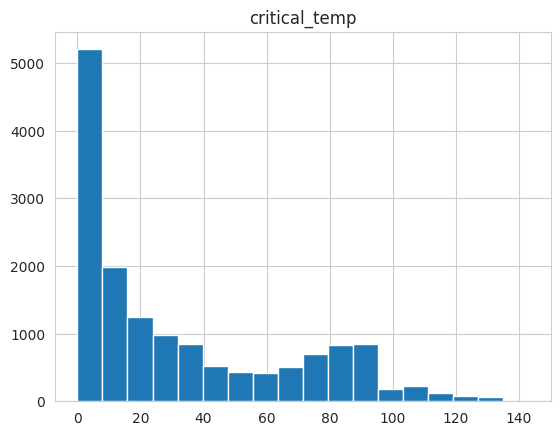

In [21]:
df.hist(col_target, bins=18)

## Correlation analysis

In [40]:
from IPython.display import Markdown

def get_high_corr_pairs(df, threshold=0.8):
    """
    Function to select feature pairs with absolute correlation higher than a threshold.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the dataset
    threshold (float): The correlation threshold (default is 0.8)
    
    Returns:
    pd.DataFrame: DataFrame with feature pairs and their correlation values
    """
    # Compute the correlation matrix
    correlation_matrix = df.corr()

    # Get the absolute values of the correlation matrix
    corr_abs = correlation_matrix.abs()

    # Create a mask to keep only the upper triangle, excluding the diagonal
    mask = np.triu(np.ones(corr_abs.shape), k=1).astype(bool)

    # Apply the mask to the correlation matrix
    corr_filtered = corr_abs.where(mask)

    # Select pairs with abs(correlation) greater than the threshold
    high_corr_pairs = corr_filtered.stack().reset_index()
    high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

    # Filter pairs based on the threshold
    high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > threshold]

    # Sort the pairs by correlation value (optional)
    high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

    return high_corr_pairs.set_index(["Feature 1", "Feature 2"]).sort_index()

def correlation_analysis(df: pd.DataFrame, method):
    df_orig = df
    if method == "pearson":
        outliers_idx = []
        for column in df.columns:
            q_low = df[column].quantile(0.001)
            q_high = df[column].quantile(0.999)
            df_outliers = df.loc[(df[column] <= q_low) | (df[column] >= q_high)]
            outliers_idx.extend(df_outliers.index.to_list())
        df = df.drop(list(set(outliers_idx)))
        print(f"Removed N={len(df_orig)-len(df)} outliers.")

    corr_matrix = df.corr(method=method)

    ax = sns.heatmap(corr_matrix)
    ax.set_title(f"Correlation matrix ({method})")
    plt.show(ax)

    display(Markdown("##### Correlation with target:"))
    corr_target = corr_matrix.loc["critical_temp"]
    corr_target_sorted = corr_target.sort_values(ascending=False, key=lambda x: abs(x))
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 10):
        display(corr_target_sorted.to_frame().iloc[:30])

    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharey=True)
    for feature, ax in zip(corr_target_sorted.index[1:4], axs):
        im = ax.hexbin(x=df_orig[feature], y=df_orig["critical_temp"], gridsize=10)
        ax.set_title(f"c={corr_target_sorted[feature]:.2f}")
        ax.set_xlabel(feature)
        ax.set_ylabel("critical_temp")
    
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
    fig.colorbar(im, cax=cbar_ax)
        
    plt.show(fig)

    display(Markdown("##### Highly correlated features:"))
    
    high_corr_features = get_high_corr_pairs(corr_matrix, threshold=0.99)
    with pd.option_context('display.max_rows', 500, 'display.max_columns', 10):
        display(high_corr_features.reset_index().sort_values("Feature 1"))
        

    return {
        "cm": corr_matrix,
        "corr_target_sorted" : corr_target_sorted,
        "high_corr_features": high_corr_features
    }

    

#### Using pearson correlation

Removed N=2368 outliers.


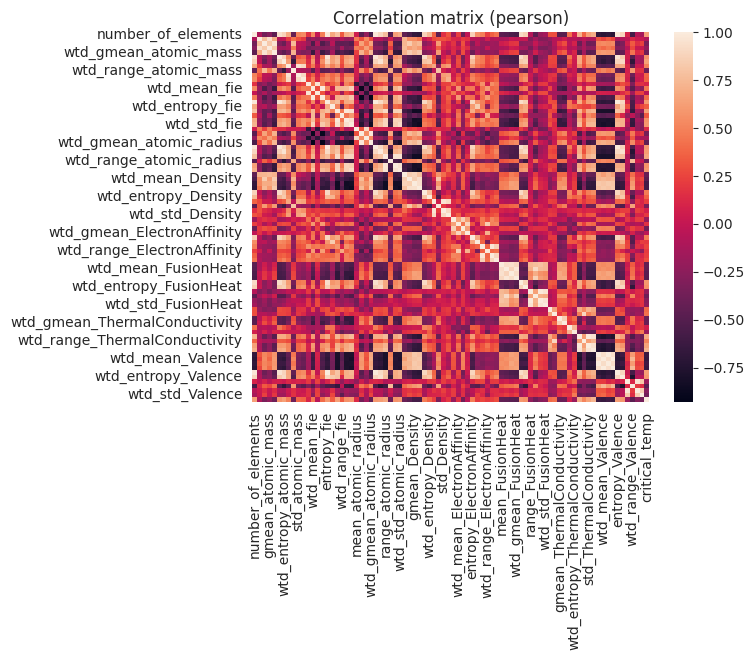

##### Correlation with target:

,critical_temp
critical_temp,1.000000
wtd_std_ThermalConductivity,0.721864
range_ThermalConductivity,0.679991
range_atomic_radius,0.656700
wtd_mean_Valence,-0.649587
std_ThermalConductivity,0.644159
wtd_gmean_Valence,-0.636957
number_of_elements,0.626339
wtd_entropy_atomic_mass,0.626306
range_fie,0.625907


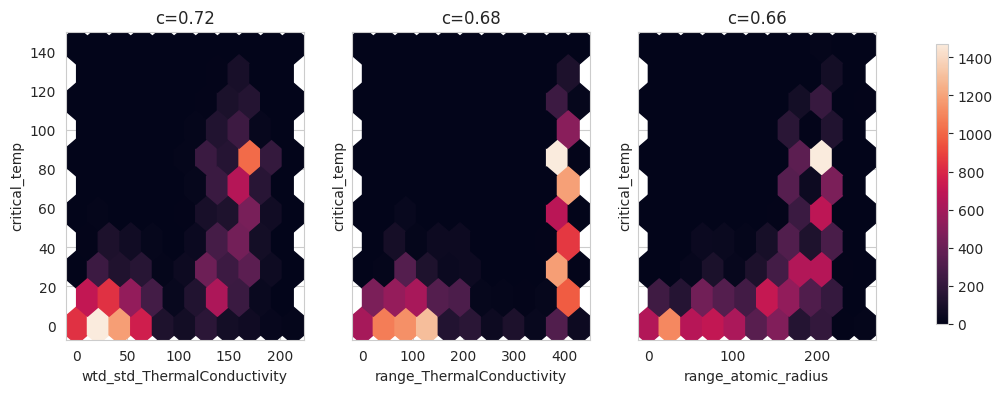

##### Highly correlated features:

,Feature 1,Feature 2,Correlation
0,entropy_ElectronAffinity,entropy_Valence,0.991907
1,entropy_atomic_mass,entropy_FusionHeat,0.993274
2,entropy_atomic_mass,entropy_Valence,0.994083
3,entropy_atomic_mass,entropy_atomic_radius,0.996215
4,entropy_atomic_mass,entropy_fie,0.994059
5,entropy_atomic_radius,entropy_ElectronAffinity,0.992179
6,entropy_atomic_radius,entropy_FusionHeat,0.990389
7,entropy_atomic_radius,entropy_Valence,0.998323
8,entropy_atomic_radius,wtd_entropy_FusionHeat,0.991089
9,entropy_atomic_radius,wtd_entropy_atomic_radius,0.991558


In [41]:
_ = correlation_analysis(df=df, method="pearson")

#### Using spearman correlation

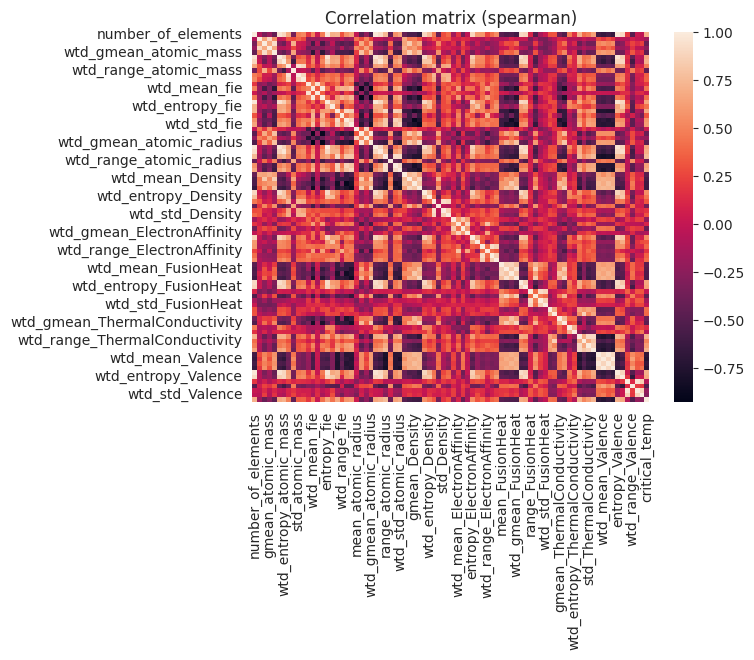

##### Correlation with target:

,critical_temp
critical_temp,1.000000
range_atomic_radius,0.755785
wtd_mean_Valence,-0.733650
wtd_gmean_Valence,-0.733636
range_ThermalConductivity,0.716786
entropy_Valence,0.714034
wtd_entropy_atomic_mass,0.712625
wtd_std_ThermalConductivity,0.707566
number_of_elements,0.699414
wtd_entropy_atomic_radius,0.694211


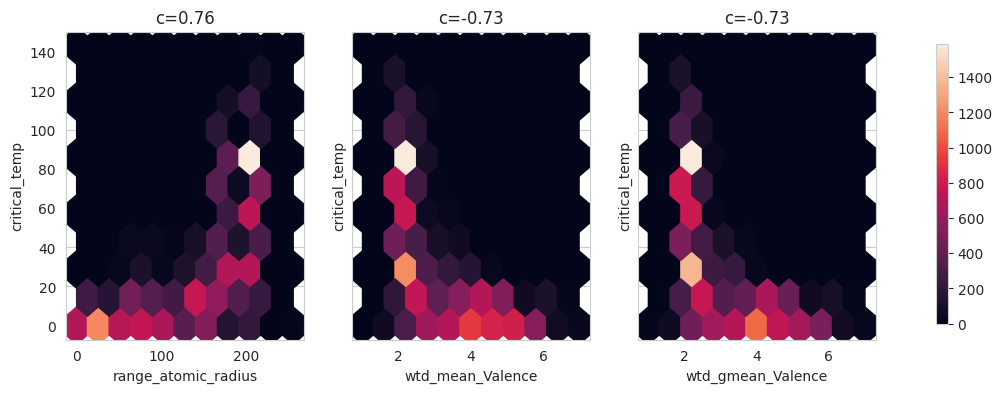

##### Highly correlated features:

,Feature 1,Feature 2,Correlation
0,entropy_FusionHeat,entropy_Valence,0.991080
1,entropy_atomic_mass,entropy_FusionHeat,0.993521
2,entropy_atomic_mass,entropy_Valence,0.996054
3,entropy_atomic_mass,entropy_atomic_radius,0.996452
4,entropy_atomic_mass,entropy_fie,0.994933
5,entropy_atomic_mass,wtd_entropy_atomic_mass,0.990739
6,entropy_atomic_radius,entropy_FusionHeat,0.991399
7,entropy_atomic_radius,entropy_Valence,0.994673
8,entropy_atomic_radius,wtd_entropy_FusionHeat,0.994099
9,entropy_atomic_radius,wtd_entropy_atomic_radius,0.991231


In [42]:
_ = correlation_analysis(df=df, method="spearman")

## PCA

In [25]:
df_features = df.drop("critical_temp", axis=1)

#### Check distributions

Pca works better if data is normally distributed

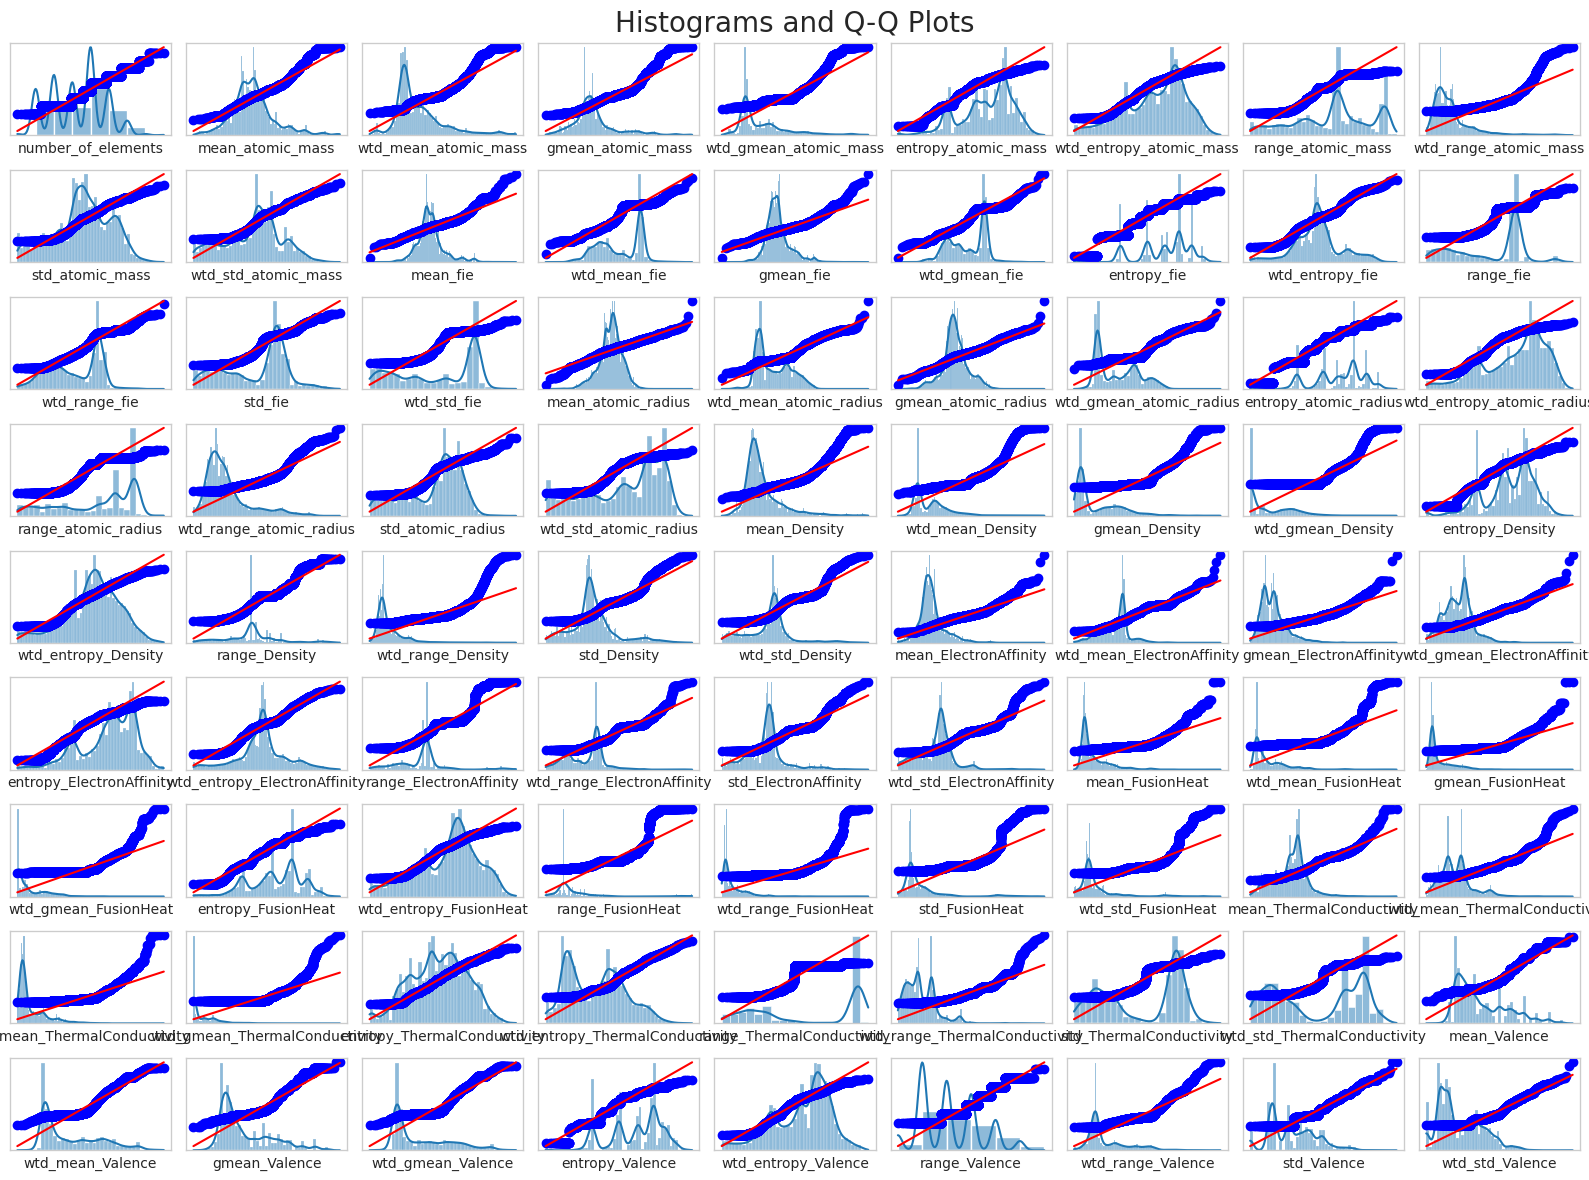

In [26]:
from scipy import stats

def plot_distributions(data, rows=4, cols=4):
    fig, axs = plt.subplots(9, 9, figsize=(16, 12))
    axs = axs.flatten()
    fig.suptitle('Histograms and Q-Q Plots', fontsize=20)
    
    for column, ax in zip(data.columns, axs):
        
        # Plot histogram
        sns.histplot(data[column], kde=True, ax=ax)
        ax.axes.get_yaxis().set_visible(False)
        ax.axes.axes.get_xaxis().set_ticks([])

        # Q-Q plot
        _ax2 = ax.twinx()
        _ax2.axes.get_yaxis().set_visible(False)
        ax2 = _ax2.twiny()
        stats.probplot(data[column], dist="norm", plot=ax2)
        ax2.get_lines()[1].set_color('r')  # Change Q-Q plot line color to red
        ax2.set_title(None)
        ax2.axes.get_xaxis().set_visible(False)
        ax2.axes.get_yaxis().set_visible(False)
    
    plt.tight_layout()
    plt.show()

plot_distributions(df_features, rows=5, cols=5)

#### How many features needed to describe most of the variance

##### On raw dataset

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
features = df.drop("critical_temp", axis=1)
features_scaled = pd.DataFrame(StandardScaler().fit_transform(features), columns=features.columns)
features_scaled

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,-0.163193,0.002409,-0.482964,-0.199241,-0.639355,-0.052968,-0.042461,0.111383,-0.116448,0.364393,...,-0.944234,-0.773365,-0.838306,-0.732221,0.107550,0.001840,-0.893244,-0.463650,-0.892997,-0.544069
1,0.518804,0.129898,-0.463684,0.017472,-0.631858,0.703476,-0.053861,0.111383,0.036086,0.116544,...,-1.182468,-0.773365,-1.147180,-0.739851,0.602053,-0.047932,-0.081669,-0.421749,-0.475307,-0.474230
2,-0.163193,0.002409,-0.482301,-0.199241,-0.639197,-0.052968,-0.254755,0.111383,0.021387,0.364393,...,-0.944234,-0.761540,-0.838306,-0.721412,0.107550,-0.095207,-0.893244,-0.435716,-0.892997,-0.527160
3,-0.163193,0.002409,-0.482632,-0.199241,-0.639276,-0.052968,-0.140985,0.111383,-0.047530,0.364393,...,-0.944234,-0.767453,-0.838306,-0.726824,0.107550,-0.043707,-0.893244,-0.449683,-0.892997,-0.535450
4,-0.163193,0.002409,-0.483627,-0.199241,-0.639513,-0.052968,0.121714,0.111383,-0.254282,0.364393,...,-0.944234,-0.785191,-0.838306,-0.742967,0.107550,0.079986,-0.893244,-0.491584,-0.892997,-0.562331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15537,-0.163193,0.350904,0.339766,-0.330636,-0.146580,-0.459597,0.105266,1.410732,0.121112,1.754265,...,0.961636,1.166049,0.797883,0.996500,-0.021711,0.320265,1.541481,0.430234,1.297640,1.801672
15538,-0.845189,0.017411,0.443986,-0.284594,0.099105,-1.181840,-0.729892,0.875796,0.683962,1.441788,...,1.358693,1.221235,1.408507,1.245106,-0.654289,0.035296,-0.081669,-0.873347,0.174662,0.575556
15539,-0.163193,0.609190,-0.623119,0.317762,-0.451408,-0.066118,0.428540,0.555938,-0.685450,1.065870,...,0.008701,0.301459,0.121349,0.357519,0.130929,-0.397818,-0.893244,0.595354,-0.892997,-0.411584
15540,-1.527186,0.363469,0.626842,0.859238,0.949802,-1.441213,-1.349898,-1.917002,0.625652,-1.934600,...,1.199870,1.331608,1.307140,1.415177,-1.684415,-1.610956,-0.893244,1.603457,-0.752707,-0.626109


In [29]:
pca = PCA()
pca.fit(features_scaled)

PCA()

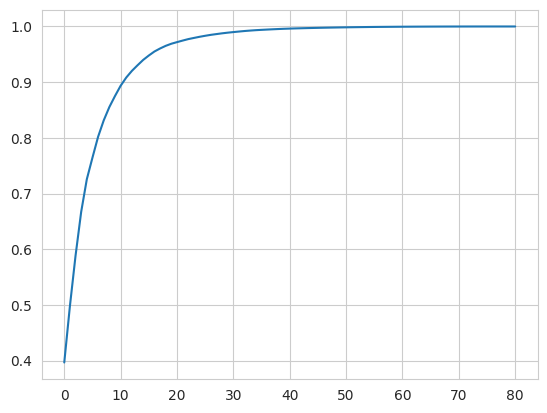

In [30]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [31]:
for i, x in enumerate(pca.explained_variance_ratio_.cumsum()):
    if x >= 0.99:
        print(i, x)
        break

31 0.9909175149719252


99% of the variance is described by the 31 principal components.

In [32]:
df_pca = pd.DataFrame(pca.transform(features_scaled), columns=[f"pc_{i}" for i in range(81)], index=df.index)
df_pca["critical_temp"] = df["critical_temp"]
df_pca

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_72,pc_73,pc_74,pc_75,pc_76,pc_77,pc_78,pc_79,pc_80,critical_temp
material,,,,,,,,,,,,,,,,,,,,,
Ba0.2La1.8Cu1O4,3.663812,-0.129566,-3.589975,1.552016,0.092763,-0.179659,0.622807,-0.608683,0.238122,-0.527476,...,0.016846,-0.012585,0.002465,0.001367,-0.000968,-0.006864,0.004238,-0.006182,0.006738,29.00
Ba0.1La1.9Ag0.1Cu0.9O4,4.547875,-0.772539,-1.880152,1.231353,0.833625,-0.805484,-0.302800,0.362776,-0.436017,0.551820,...,0.097374,-0.020901,-0.028929,-0.001217,-0.014741,-0.011766,0.006365,-0.002463,0.006267,26.50
Ba0.1La1.9Cu1O4,3.486145,-0.096642,-3.728382,1.631068,0.123749,-0.144831,0.648787,-0.417408,0.374655,-0.533570,...,0.009941,-0.006739,0.001597,0.000631,0.000672,-0.005387,0.006949,-0.005468,0.007699,19.00
Ba0.15La1.85Cu1O4,3.579849,-0.114853,-3.654368,1.590468,0.107752,-0.163816,0.634336,-0.516198,0.304509,-0.529587,...,0.014055,-0.009988,0.002096,0.001223,-0.000198,-0.006202,0.005490,-0.005896,0.007179,28.00
Ba0.3La1.7Cu1O4,3.810903,-0.151972,-3.482054,1.479978,0.064550,-0.204433,0.606053,-0.780380,0.113139,-0.526941,...,0.019709,-0.016259,0.002852,0.000697,-0.002268,-0.007845,0.002136,-0.006454,0.006015,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ce1Bi1S2O1,1.369189,3.898138,2.315589,3.633171,-4.762067,-0.744629,0.767679,-0.137175,-0.292834,-1.213836,...,0.031281,-0.009884,0.022333,0.016688,0.036921,0.003496,0.004512,0.002816,-0.001634,2.30
Ti1Ir1Si1,-3.979916,2.336147,5.002307,2.317317,3.137252,1.972534,3.266021,-1.464973,-1.796035,0.864850,...,0.036991,0.015224,0.016297,0.020578,-0.024009,-0.013192,-0.005664,-0.003032,0.003323,1.85
Tm0.84Lu0.16Fe3Si5,-2.408263,0.167022,1.389512,-2.229608,3.038842,-1.925789,-0.141279,-0.430024,0.093396,-0.845907,...,-0.059177,-0.051274,0.010692,0.027255,-0.024154,0.017680,-0.037431,0.000548,0.011812,2.44


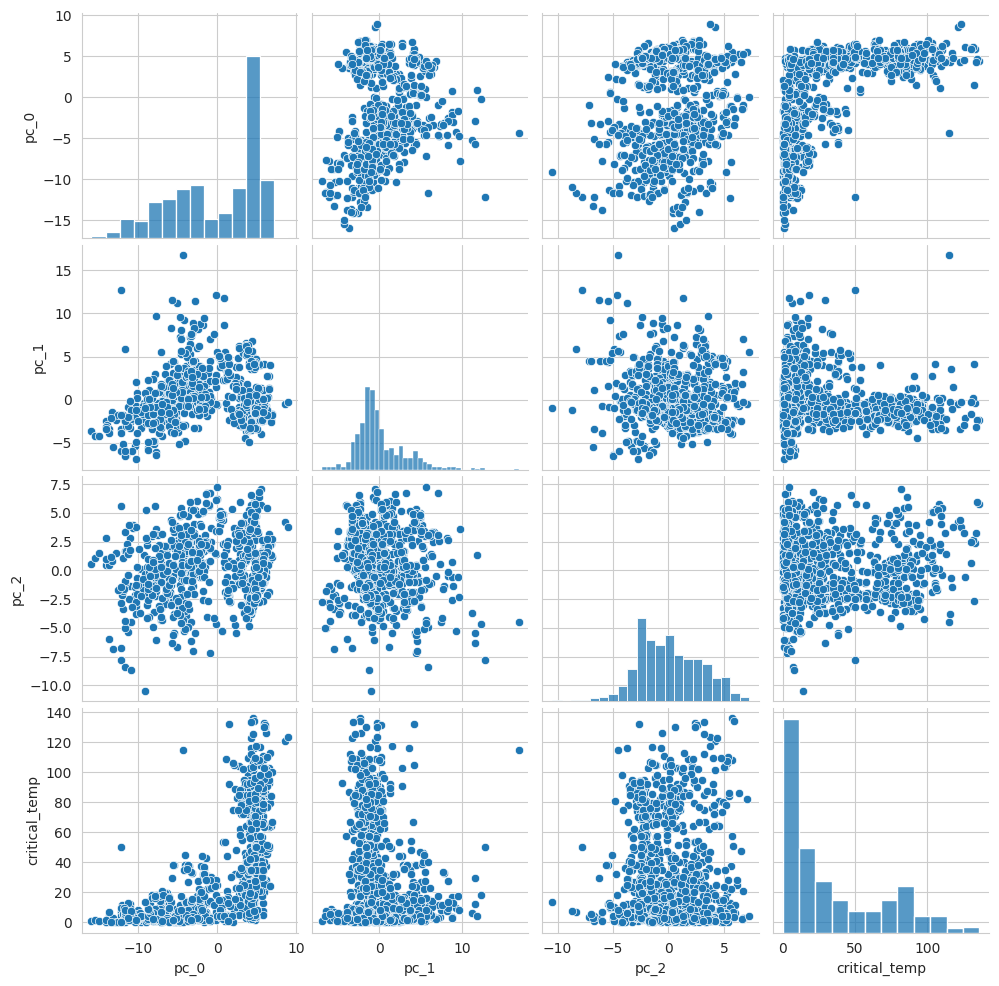

In [33]:
sns.pairplot(df_pca.sample(1000), vars=[f"pc_{i}" for i in range(3)]+["critical_temp"])